<a href="https://colab.research.google.com/github/RiteshopShrivastava/Gold-Price-forecasting/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gold Price Prediction** 
**Objective :**- Forecasting gold price for next 30 days based on historical data.
(Considering last four years of historical data)

In [101]:
!pip install yfinance

In [102]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [103]:
start='2018-01-01'
end=date.today().strftime('%Y-%m-%d')
data=yf.download('GC=F',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [104]:
data=yf.download('GC=F',start=start,end=end)[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976
...,...
2021-12-21,1787.900024
2021-12-22,1801.599976
2021-12-23,1811.199951


In [105]:
data.rename(columns={"Adj Close": 'Price'},inplace=True)

In [106]:
data.head()

,Price
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976


In [107]:
data.tail()

,Price
Date,
2021-12-21,1787.900024
2021-12-22,1801.599976
2021-12-23,1811.199951
2021-12-27,1808.099976
2021-12-28,1810.199951


In [108]:
train = data.head(804)
test = data.tail(200)

## **EDA**

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2018-01-02 to 2021-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1005 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB


**Line chart**

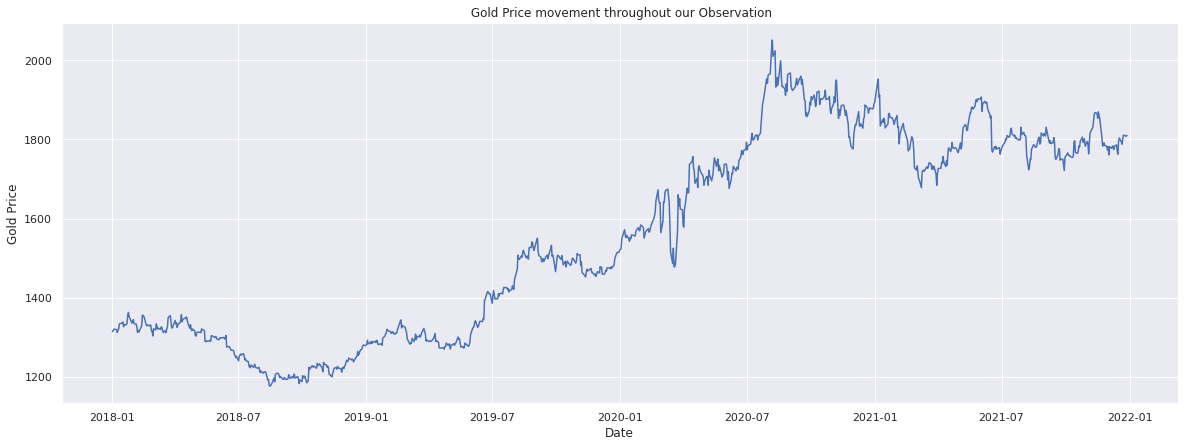

In [110]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.set(style='darkgrid')
sns.lineplot( y="Price", x="Date", data=data)
#sns.lineplot( y="Price", x=data.index, data=data)
plt.title(" Gold Price movement throughout our Observation")
plt.ylabel('Gold Price')
plt.show()

**Another Way to draw line chart**

In [111]:
#from IPython.core.pylabtools import figsize
#plt.figure(figsize=(20,7))
#data.Price.plot()
#plt.title(" Gold Price movement throughout our Observation")
#plt.ylabel('Gold Price')
#plt.show()

In [112]:
data

,Price
Date,
2018-01-02,1313.699951
2018-01-03,1316.199951
2018-01-04,1319.400024
2018-01-05,1320.300049
2018-01-08,1318.599976
...,...
2021-12-21,1787.900024
2021-12-22,1801.599976
2021-12-23,1811.199951


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2018-01-02 to 2021-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1005 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB


In [114]:
data.isnull().sum()

Price    0
dtype: int64

In [115]:
print(len(data))

1005


In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1005.0,1558.044875,249.371879,1176.199951,1311.300049,1526.5,1791.400024,2051.5


### **Checking for Stationarity in data using Dickey-Fuller test**

In [117]:
X = train['Price'].values

result = adfuller(X)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(f'Inference: Time Series is {"non" if result[1]>=0.05 else" "} stationary')

ADF Statistic: -0.542786
p-value: 0.883393
Critical Values:
Inference: Time Series is non stationary


## **As the p-value > 0.05, we Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.**

### **Auto correlation graph**

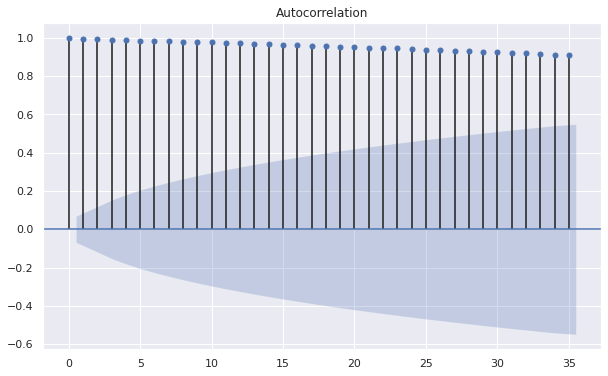

In [118]:
plt.rc("figure", figsize=(10,6))
plot_acf(train['Price'],lags=35)
plt.show()

### **PACF graph**

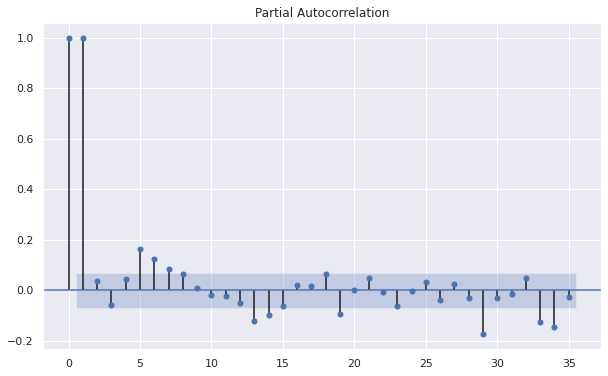

In [119]:
plot_pacf(train['Price'],lags=35)
plt.show()

## **DIFFERENCE TRANSFORM to remove Seasonality**

In [120]:
data_without_sea = train.diff().dropna()

In [121]:
data_without_sea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 803 entries, 2018-01-03 to 2021-03-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   803 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


### **Again checking for Stationarity in data using Dickey-Fuller test**

In [122]:
X = data_without_sea['Price'].values
result = adfuller(X)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(f'Inference: Time Series is {"non" if result[1]>=0.05 else" "}stationary')

ADF Statistic: -13.530644
p-value: 0.000000
Critical Values:
Inference: Time Series is  stationary


### **Auto correlation graph after 1 step differencing**

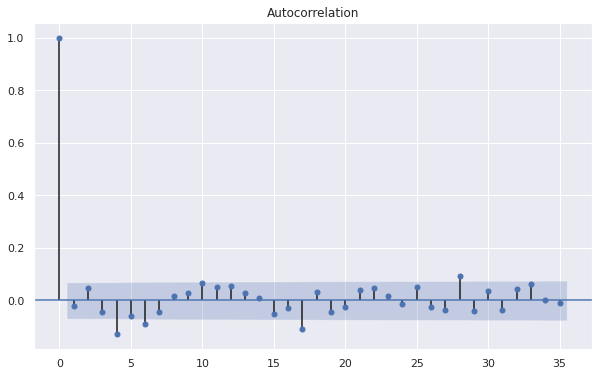

In [123]:
plt.rc("figure", figsize=(10,6))
plot_acf(data_without_sea['Price'], lags=35)
plt.show()

### **Partial Auto Correlation graph after differencing**

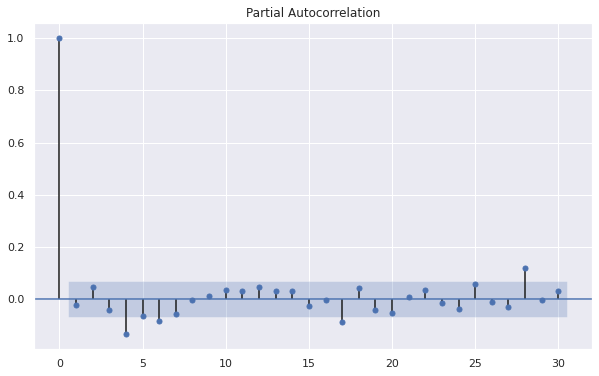

In [124]:
plt.rc("figure", figsize=(10,6))
plot_pacf(data_without_sea)
plt.show()

In [125]:
data_without_sea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 803 entries, 2018-01-03 to 2021-03-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   803 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


In [126]:
# separate out a validation dataset

print('Dataset %d, Validation %d' % (len(train), len(test)))
train.to_csv('dataset.csv', header=False)
test.to_csv('validation.csv', header=False)


Dataset 804, Validation 200


### **Persistence/ Base model**

In [157]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.60)
train, test = X[0:train_size], X[train_size:]

In [158]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=1462.300, Expected=1478.200
>Predicted=1478.200, Expected=1474.000
>Predicted=1474.000, Expected=1476.900
>Predicted=1476.900, Expected=1459.100
>Predicted=1459.100, Expected=1459.300
>Predicted=1459.300, Expected=1462.600
>Predicted=1462.600, Expected=1469.400
>Predicted=1469.400, Expected=1466.700
>Predicted=1466.700, Expected=1475.600
>Predicted=1475.600, Expected=1475.000
>Predicted=1475.000, Expected=1474.600
>Predicted=1474.600, Expected=1472.600
>Predicted=1472.600, Expected=1478.200
>Predicted=1478.200, Expected=1474.700
>Predicted=1474.700, Expected=1482.500
>Predicted=1482.500, Expected=1499.100
>Predicted=1499.100, Expected=1509.300
>Predicted=1509.300, Expected=1513.800
>Predicted=1513.800, Expected=1514.500
>Predicted=1514.500, Expected=1519.500
>Predicted=1519.500, Expected=1524.500
>Predicted=1524.500, Expected=1549.200
>Predicted=1549.200, Expected=1566.200
>Predicted=1566.200, Expected=1571.800
>Predicted=1571.800, Expected=1557.400
>Predicted=1557.400, Expe

### **ARIMA Hyperparameters**

In [159]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

### **Grid search for p,d,q values**

In [160]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [161]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=340.046
ARIMA(0, 0, 1) RMSE=179.053
ARIMA(0, 1, 0) RMSE=20.948
ARIMA(0, 1, 1) RMSE=21.039
ARIMA(0, 1, 2) RMSE=21.141
ARIMA(0, 2, 0) RMSE=29.812
ARIMA(0, 2, 1) RMSE=21.023
ARIMA(1, 0, 0) RMSE=20.979
ARIMA(1, 1, 0) RMSE=21.049
ARIMA(1, 2, 0) RMSE=25.509
ARIMA(1, 2, 1) RMSE=21.128
ARIMA(2, 0, 0) RMSE=21.778
ARIMA(2, 1, 0) RMSE=21.135
ARIMA(2, 1, 1) RMSE=21.197
ARIMA(2, 2, 0) RMSE=24.497
Best ARIMA(0, 1, 0) RMSE=20.948


### **Build Model based on the optimized values**

In [162]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [163]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

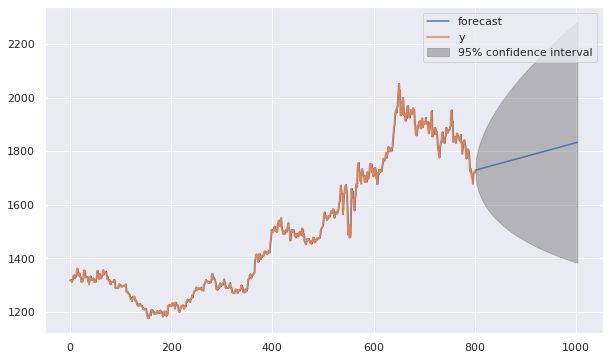

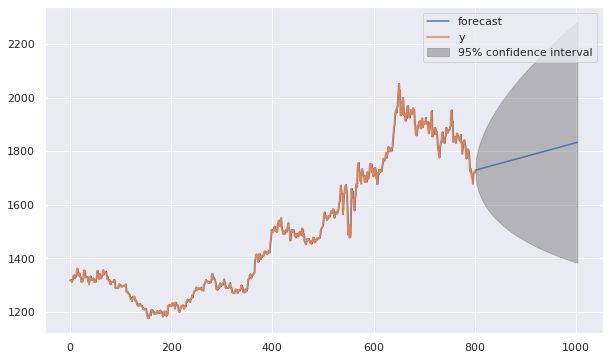

In [164]:
# fit model
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=200)[0]
model_fit.plot_predict(1, 1004)

In [165]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

54.2776720598264

In [166]:
val[1]

0      1726.800049
1      1732.199951
2      1741.400024
3      1737.800049
4      1724.699951
          ...     
195    1787.900024
196    1801.599976
197    1811.199951
198    1808.099976
199    1810.199951
Name: 1, Length: 200, dtype: float64

In [167]:
forecast

array([1729.41461303, 1729.92920165, 1730.44379027, 1730.95837889,
       1731.47296751, 1731.98755613, 1732.50214475, 1733.01673337,
       1733.53132199, 1734.04591061, 1734.56049923, 1735.07508785,
       1735.58967647, 1736.10426509, 1736.61885371, 1737.13344233,
       1737.64803095, 1738.16261957, 1738.67720819, 1739.19179681,
       1739.70638543, 1740.22097405, 1740.73556267, 1741.25015129,
       1741.76473991, 1742.27932853, 1742.79391715, 1743.30850577,
       1743.82309439, 1744.33768301, 1744.85227163, 1745.36686025,
       1745.88144887, 1746.39603749, 1746.91062611, 1747.42521473,
       1747.93980335, 1748.45439197, 1748.96898059, 1749.48356921,
       1749.99815783, 1750.51274645, 1751.02733507, 1751.54192369,
       1752.05651231, 1752.57110093, 1753.08568955, 1753.60027817,
       1754.11486679, 1754.62945541, 1755.14404403, 1755.65863265,
       1756.17322127, 1756.68780989, 1757.20239851, 1757.71698713,
       1758.23157575, 1758.74616437, 1759.26075299, 1759.77534

### **Combine train and test data and build final model**

In [169]:
# fit model
#data = read_csv('data', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [170]:
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit()

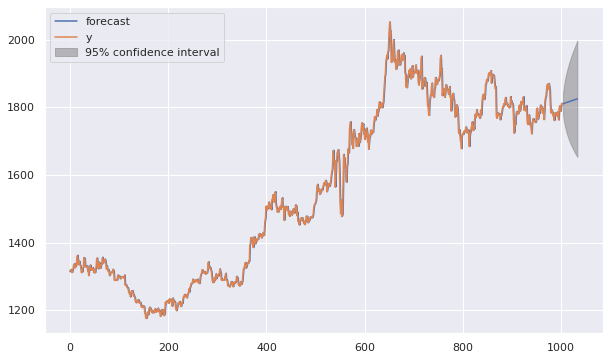

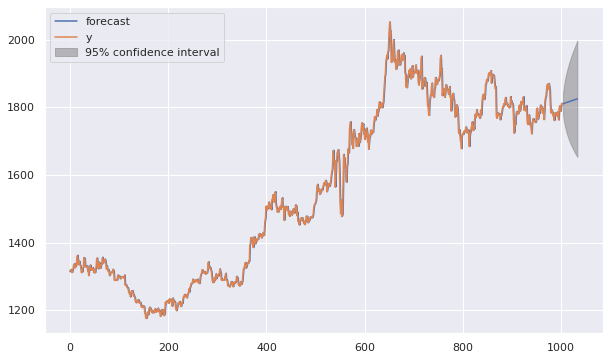

In [171]:
forecast_final=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1,1034)

In [172]:
forecast_final

array([1810.69447308, 1811.188995  , 1811.68351691, 1812.17803882,
       1812.67256073, 1813.16708265, 1813.66160456, 1814.15612647,
       1814.65064838, 1815.1451703 , 1815.63969221, 1816.13421412,
       1816.62873603, 1817.12325794, 1817.61777986, 1818.11230177,
       1818.60682368, 1819.10134559, 1819.59586751, 1820.09038942,
       1820.58491133, 1821.07943324, 1821.57395516, 1822.06847707,
       1822.56299898, 1823.05752089, 1823.55204281, 1824.04656472,
       1824.54108663, 1825.03560854])